<a href="https://colab.research.google.com/github/jeetshah0303/Artificialintelligence/blob/main/PADlab2_partA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#principal component analysis
#eigen values and eigen vectors


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('IRIS_dataset.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.shape

(150, 5)

In [ ]:
x=df[['sepal_length','sepal_width','petal_length','petal_width']]

In [ ]:
y=df[['species']]

In [ ]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y.head()

,species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [ ]:
#determine the covariance matrix 
features=x.T #transposing x
features.shape
features.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149
sepal_length,5.1,4.9,4.7,4.6,5.0,5.4,4.6,5.0,4.4,4.9,5.4,4.8,4.8,4.3,5.8,5.7,5.4,5.1,5.7,5.1,5.4,5.1,4.6,5.1,4.8,5.0,5.0,5.2,5.2,4.7,4.8,5.4,5.2,5.5,4.9,5.0,5.5,4.9,4.4,5.1,...,6.5,6.4,6.8,5.7,5.8,6.4,6.5,7.7,7.7,6.0,6.9,5.6,7.7,6.3,6.7,7.2,6.2,6.1,6.4,7.2,7.4,7.9,6.4,6.3,6.1,7.7,6.3,6.4,6.0,6.9,6.7,6.9,5.8,6.8,6.7,6.7,6.3,6.5,6.2,5.9
sepal_width,3.5,3.0,3.2,3.1,3.6,3.9,3.4,3.4,2.9,3.1,3.7,3.4,3.0,3.0,4.0,4.4,3.9,3.5,3.8,3.8,3.4,3.7,3.6,3.3,3.4,3.0,3.4,3.5,3.4,3.2,3.1,3.4,4.1,4.2,3.1,3.2,3.5,3.1,3.0,3.4,...,3.2,2.7,3.0,2.5,2.8,3.2,3.0,3.8,2.6,2.2,3.2,2.8,2.8,2.7,3.3,3.2,2.8,3.0,2.8,3.0,2.8,3.8,2.8,2.8,2.6,3.0,3.4,3.1,3.0,3.1,3.1,3.1,2.7,3.2,3.3,3.0,2.5,3.0,3.4,3.0
petal_length,1.4,1.4,1.3,1.5,1.4,1.7,1.4,1.5,1.4,1.5,1.5,1.6,1.4,1.1,1.2,1.5,1.3,1.4,1.7,1.5,1.7,1.5,1.0,1.7,1.9,1.6,1.6,1.5,1.4,1.6,1.6,1.5,1.5,1.4,1.5,1.2,1.3,1.5,1.3,1.5,...,5.1,5.3,5.5,5.0,5.1,5.3,5.5,6.7,6.9,5.0,5.7,4.9,6.7,4.9,5.7,6.0,4.8,4.9,5.6,5.8,6.1,6.4,5.6,5.1,5.6,6.1,5.6,5.5,4.8,5.4,5.6,5.1,5.1,5.9,5.7,5.2,5.0,5.2,5.4,5.1
petal_width,0.2,0.2,0.2,0.2,0.2,0.4,0.3,0.2,0.2,0.1,0.2,0.2,0.1,0.1,0.2,0.4,0.4,0.3,0.3,0.3,0.2,0.4,0.2,0.5,0.2,0.2,0.4,0.2,0.2,0.2,0.2,0.4,0.1,0.2,0.1,0.2,0.2,0.1,0.2,0.2,...,2.0,1.9,2.1,2.0,2.4,2.3,1.8,2.2,2.3,1.5,2.3,2.0,2.0,1.8,2.1,1.8,1.8,1.8,2.1,1.6,1.9,2.0,2.2,1.5,1.4,2.3,2.4,1.8,1.8,2.1,2.4,2.3,1.9,2.3,2.5,2.3,1.9,2.0,2.3,1.8


In [ ]:
covariance_matrix=np.cov(features)
covariance_matrix

array([[ 0.68569351, -0.03926846,  1.27368233,  0.5169038 ],
       [-0.03926846,  0.18800403, -0.32171275, -0.11798121],
       [ 1.27368233, -0.32171275,  3.11317942,  1.29638747],
       [ 0.5169038 , -0.11798121,  1.29638747,  0.58241432]])

In [ ]:
eigen_vals,eigen_vecs=np.linalg.eig(covariance_matrix)
eigen_vals

array([4.22484077, 0.24224357, 0.07852391, 0.02368303])

In [ ]:
eigen_vecs

array([[ 0.36158968, -0.65653988, -0.58099728,  0.31725455],
       [-0.08226889, -0.72971237,  0.59641809, -0.32409435],
       [ 0.85657211,  0.1757674 ,  0.07252408, -0.47971899],
       [ 0.35884393,  0.07470647,  0.54906091,  0.75112056]])

In [ ]:
eigen_vals[0]/sum(eigen_vals)

0.9246162071742685

In [ ]:
#projecting the data on the first eigen vector 
projected_x=x.dot(eigen_vecs.T[0])
projected_x

0      2.827136
1      2.795952
2      2.621524
3      2.764906
4      2.782750
         ...   
145    7.455360
146    7.037007
147    7.275389
148    7.412972
149    6.901009
Length: 150, dtype: float64

In [ ]:
#visualising the dataset 
result=pd.DataFrame(projected_x,columns=['PC1'])
result['y-axis']=0.0
result['label']=y
result.head()

,PC1,y-axis,label
0,2.827136,0.0,Iris-setosa
1,2.795952,0.0,Iris-setosa
2,2.621524,0.0,Iris-setosa
3,2.764906,0.0,Iris-setosa
4,2.782750,0.0,Iris-setosa


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


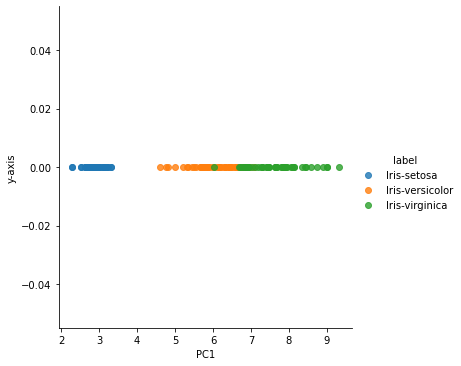

In [ ]:
#plotting this transformed dataset 
import seaborn as sns 
sns.lmplot('PC1','y-axis',data=result,fit_reg=False,hue='label')